# Исследование гипотез для увеличения выручки.

В данном проекте мы исследуем гипотезы для выявления тех, чье внедрение окажет положительное влияние на выручку компании. В первой части с помощью методов ICE и RICE мы определим те гипотезы,  которые необходимо проверить в первую очередь.
Во второй части мы проанализируем итоги А/В теста и примем решение о результатах данного теста и есть ли необходимость в его продолжении.

##  Приоритизация гипотез.

Было составлено 9 гипотез по увеличению выручки интернет-магазина. Изучим данные и определим, какие гипотезу нуждаются в проверке в первую очередь.

In [ ]:
import pandas as pd
df=pd.read_csv('/datasets/hypothesis.csv')
df.columns=['hypothesis','reach','impact','confidence','efforts']
pd.options.display.max_colwidth=110

In [ ]:
df

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Каждой гипотезе эксперты дали оценку по 4 критериям:

- reach- охват пользователей;

- impact -сила влияния изменений на пользователей;

- confidence- уверенность в правильной оценке других параметров;

- efforts- насколько дорого будет тестировать данную гипотезу.

ICE и RICE одни из популярных способов приоритизации задач. Модификация RICE в отличии от ICE использует для оценки все четыре критерия, в ICE не учитывается охват пользователей.

In [ ]:
#считаем ICE
df['ICE']=df['impact']*df['confidence']/df['efforts']
df['ICE']=round(df['ICE'],2)
pd.options.display.max_colwidth=60
print (df[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))


                                                    hypothesis    ICE
8      Запустить акцию, дающую скидку на товар в день рождения  16.20
0  Добавить два новых канала привлечения трафика, что позво...  13.33
7  Добавить форму подписки на все основные страницы, чтобы ...  11.20
6  Показать на главной странице баннеры с актуальными акция...   8.00
2  Добавить блоки рекомендаций товаров на сайт интернет маг...   7.00
1  Запустить собственную службу доставки, что сократит срок...   2.00
5  Добавить страницу отзывов клиентов о магазине, что позво...   1.33
3  Изменить структура категорий, что увеличит конверсию, т....   1.12
4  Изменить цвет фона главной страницы, чтобы увеличить вов...   1.00


Мы оценили все гипотезы и выбрали наиболее приоритетные, согласно методу ICE.Следующие гипотезы нуждаются в проверке в первую очередь:
- запустить акцию, дающую скидку на товар в день рождения,
- добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
- добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

In [ ]:
#считаем RICE
df['RICE']=df['reach']*df['impact']*df['confidence']/df['efforts']
df['RICE']=round(df['RICE'],2)
pd.options.display.max_colwidth=60
print(df[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))


                                                    hypothesis   RICE
7  Добавить форму подписки на все основные страницы, чтобы ...  112.0
2  Добавить блоки рекомендаций товаров на сайт интернет маг...   56.0
0  Добавить два новых канала привлечения трафика, что позво...   40.0
6  Показать на главной странице баннеры с актуальными акция...   40.0
8      Запустить акцию, дающую скидку на товар в день рождения   16.2
3  Изменить структура категорий, что увеличит конверсию, т....    9.0
1  Запустить собственную службу доставки, что сократит срок...    4.0
5  Добавить страницу отзывов клиентов о магазине, что позво...    4.0
4  Изменить цвет фона главной страницы, чтобы увеличить вов...    3.0


**Вывод**:

Так как методика RICE учитывает еще и охват пользователей, то вместо гипотезы о акции, которая дает скидку в день рождения, в тройку лидеров вошла гипотеза "добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек", у которой охват пользователей больше, так как касается всех пользователей, а не только тех, у которых день рождение в момент заказа.

## Анализ А/В теста

Изучим и преобразуем имеющиеся данные. Скачаем необходимые библиотеки.

In [ ]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
import scipy.stats as stats
from matplotlib.pyplot import figure

In [ ]:
orders=pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
orders['date'].min()

'2019-08-01'

In [ ]:
orders['date'].max()

'2019-08-31'

In [ ]:
visitors=pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
visitors['date'].min()

'2019-08-01'

In [ ]:
visitors['date'].max()

'2019-08-31'

In [ ]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [ ]:
orders.duplicated().sum() 

0

In [ ]:
visitors.duplicated().sum() 

0

Для проведения А/В теста и проверки гипотезы все пользователи интернет-магазина были разделены на две группы: А и В. Тест проходил в течение августа 2019 г. Есть данные о заказах, сделанных в этот период, а также о количестве покупателей каждый день, относящихся к группе А или группе В. Пропусков и дубликатов в данных нет.

Проверим, есть ли пользователи, которые входят сразу в две группы.

In [ ]:
dfA=orders.query('group == "A"')['visitorId']
dfA

2       4069496402
7         78758296
8        295230930
10       879864040
12      3213223594
           ...    
1187     132143192
1188    1022829655
1193     370388673
1194     573423106
1195    1614305549
Name: visitorId, Length: 557, dtype: int64

In [ ]:
dfB=orders.query('group == "B"')['visitorId']
dfB


0       3312258926
1       3642806036
3       1196621759
4       2322279887
5        935554773
           ...    
1189     393266494
1190    1197745035
1191     608641596
1192    3733762160
1196    2108080724
Name: visitorId, Length: 640, dtype: int64

In [ ]:
dfAB=np.intersect1d(dfA,dfB)
print(dfAB)
print('Количество пользователей, находящихся сразу в обеих группах:',len(dfAB))

[   8300375  199603092  232979603  237748145  276558944  351125977
  393266494  457167155  471551937  477780734  818047933  963407295
 1230306981 1294878855 1316129916 1333886533 1404934699 1602967004
 1614305549 1648269707 1668030113 1738359350 1801183820 1959144690
 2038680547 2044997962 2378935119 2458001652 2579882178 2587333274
 2600415354 2654030115 2686716486 2712142231 2716752286 2780786433
 2927087541 2949041841 2954449915 3062433592 3202540741 3234906277
 3656415546 3717692402 3766097110 3803269165 3891541246 3941795274
 3951559397 3957174400 3963646447 3972127743 3984495233 4069496402
 4120364173 4186807279 4256040402 4266935830]
Количество пользователей, находящихся сразу в обеих группах: 58


In [ ]:
print('Количество пользователей, участвовавших в эксперименте:',len(orders['visitorId'].unique()))

Количество пользователей, участвовавших в эксперименте: 1031


Так как доля пользователей, которые одновременно попали в обе группы теста, небольшая, мы их можем оставить без изменения.

### График кумулятивной выручки по группам.

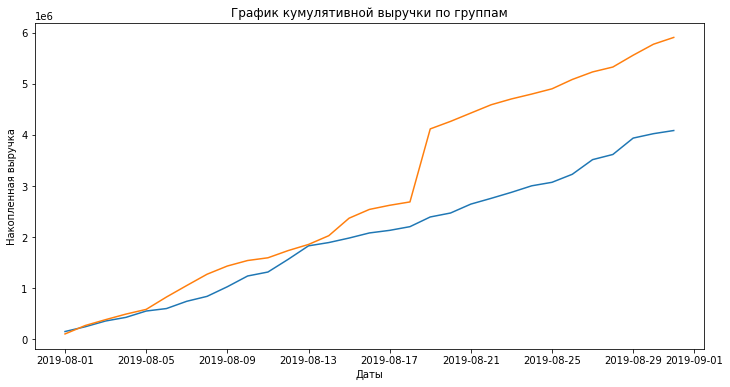

In [ ]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title('График кумулятивной выручки по группам')
ax.set_xlabel('Даты')
ax.set_ylabel('Накопленная выручка')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')



None

**Вывод**:

Сначала графики кумулятивной выручки групп были примерно одинаковы, но потом накопленная выручка группы В была стабильно выше группы А. Около 18 августа мы видим большой всплеск выручки группы В. Возможно, это произошло из-за большого количества заказов или одного заказа по высокой цене. Несмотря на очевидный выброс, выручка группы В стабильно выше группы А.

### График кумулятивного среднего чека по группам.

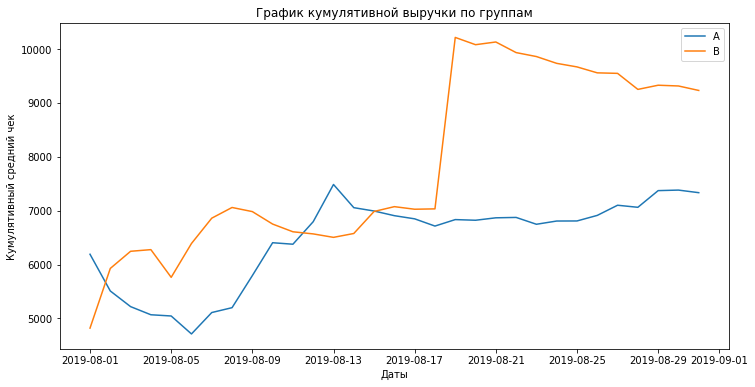

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title('График кумулятивной выручки по группам')
ax.set_xlabel('Даты')
ax.set_ylabel('Кумулятивный средний чек')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
None

**Вывод**:

накопленная сумма средних чеков группы В, в основном, выше чем у группы А. Но выброс около 18 августа сильно искажает картину. Без него выводы ,возможно, были бы другими.

### График относительного изменения кумулятивного среднего чека группы В к группе А.

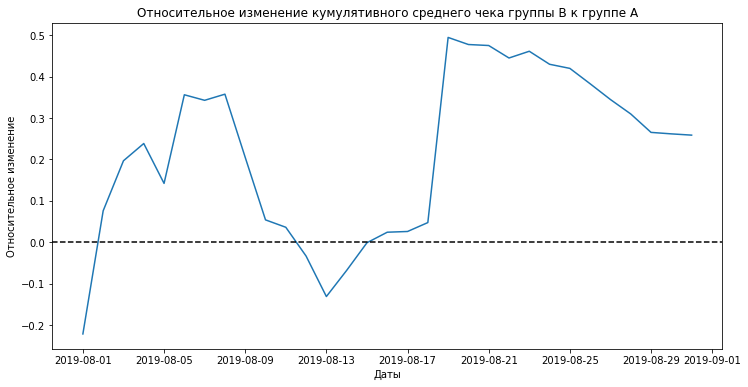

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title('Относительное изменение кумулятивного среднего чека группы В к группе А')
ax.set_xlabel('Даты')
ax.set_ylabel('Относительное изменение')

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
None

**Вывод**:
    
результаты теста за период проведения несколько раз менялись. Можно сделать предварительный вывод о том, что средний чек группы В
выше чем группы А. Но для более достоверных результатов необходимо или проводить тест дальше, или исключить аномальные значения.

### График кумулятивной конверсии по группам.

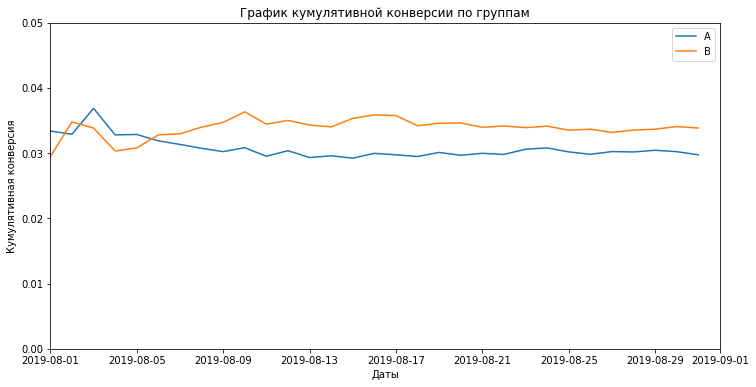

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title('График кумулятивной конверсии по группам')
ax.set_xlabel('Даты')
ax.set_ylabel('Кумулятивная конверсия')

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
None

**Вывод**:

конверсия группы В стабильно превышает конверсию группы А. Обе конверсии зафиксировались на определенном уровне.

### График относительного изменения кумулятивной конверсии группы В к группе А.

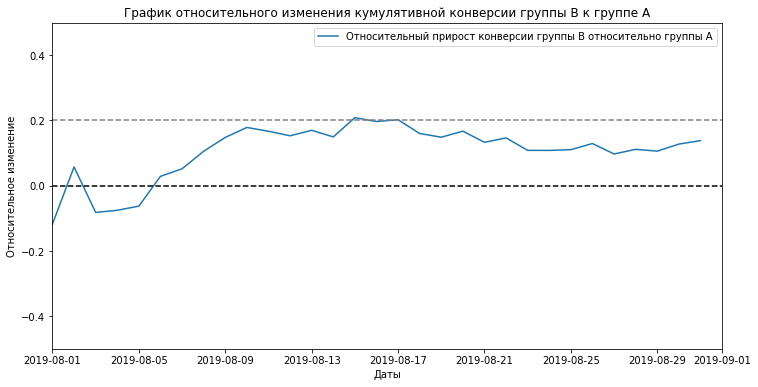

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title('График относительного изменения кумулятивной конверсии группы В к группе А')
ax.set_xlabel('Даты')
ax.set_ylabel('Относительное изменение')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-1", '2019-09-1', -0.5, 0.5]) 
None

**Вывод**:

в самом начале график относительный прирост конверсии группы В к группе А снижался и был даже отом отрицательным. Но потом произошел рост и конверсия группы В стала стабильно выше конверсии группы А.

### График количества заказов по пользователям.

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


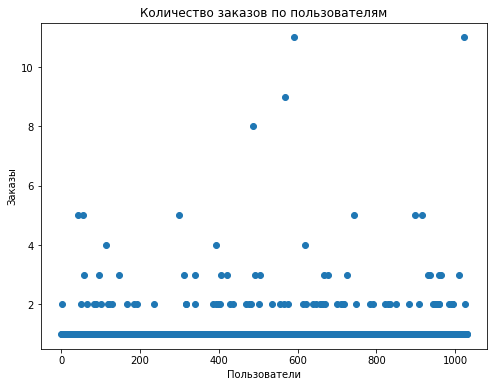

In [ ]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

x_values = pd.Series(range(0,len(ordersByUsers)))
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_title('Количество заказов по пользователям')
ax.set_xlabel('Пользователи')
ax.set_ylabel('Заказы')

plt.scatter(x_values, ordersByUsers['orders']) 
None

**Вывод:**

большинство пользователей делали 1 заказ за время проведения теста. Небольшая часть пользователей делали 2 и 3 заказа. И совсем редкие пользователи заказывали товар более 3 раз.

### 95-й и 99-й перцентили количества заказов на пользователя.

In [ ]:

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

print(np.percentile(ordersByUsers['orders'], [ 95, 99])) 


       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
[2. 4.]


**Вывод:**

не более 5% пользователей оформляли более 2 заказов и не более 1%-4 заказа и более. Граница в определении аномальных заказов-3 заказа и более.

### Точечный график стоимости заказов.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


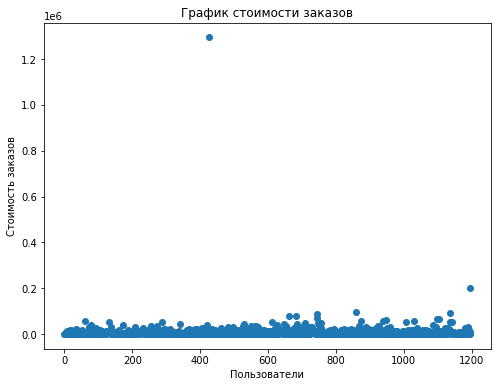

In [ ]:
print(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_title('График стоимости заказов')
ax.set_xlabel('Пользователи')
ax.set_ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue']) 
None

**Вывод**:
основная масса заказов до 100.000 рублей. Но встречаются аномально большие заказы стоимостью более чем 1 млн.рублей.

### 95-й и 99-й перцентили стоимости заказов. 

In [ ]:
print(orders.head(10))
np.percentile(orders['revenue'], [ 95, 99])

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
5      182168103   935554773 2019-08-15     2210     B
6      398296753  2900797465 2019-08-15     1860     B
7     2626614568    78758296 2019-08-15     1044     A
8     1576988021   295230930 2019-08-15    13710     A
9     1506739906  1882260405 2019-08-15     1855     B


array([28000. , 58233.2])

**Вывод:**
не более 5% заказов были со стоимостью более 28000 рублей. И не более 1%- со стоимостью более 58000 рублей. В качестве границы аномальной стоимости возьмем сумму в 28000 рублей.

### Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным. 

Сформулируем две гипотезы.
Нулевая гипотеза-различий в среднем количестве заказов между группами А и В по "сырым" данным нет.
Первая-различия между группами есть.


In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие между группами',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

**Вывод**:

p-value равно 0.017, а значит меньше чем 0.05. Значит нулевую гипотезу о том, что различий в среднем числе заказов между группами нет, мы отвергаем. Относительное различие в среднем между группами-около 14%.



### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем две гипотезы.
Нулевая гипотеза-различий в среднем чеке между группами А и В по "сырым" данным нет.
Первая-различия между группами есть.

In [ ]:

print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие между группами','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-value: 0.729
Относительное различие между группами 0.259


**Вывод:**
 P-value больше чем 0.05, значит статистически значимых различий в среднем чеке между группами нет. Нулевую гипотезу не можем отвергнуть.
Относительное различие в среднем чеке между группами достаточно большое -26%, но оно не статистически значимо. Необходимо проанализировать этот показатель по данным, очищенным от аномалий.

### Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным. 

Уберем из данных выбросы. В данных о заказах оставим только те, где количество заказов не превышает двух и стоимость которых не превышает 28.000 рублей.
Также как и по "сырым" данным, сформулируем две гипотезы:
Сформулируем две гипотезы.
Нулевая гипотеза-различий в среднем количестве заказов между группами А и В по "очищенным" данным нет.
Первая-различия между группами есть.

In [ ]:


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие между группами','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.013
Относительное различие между группами 0.173


**Вывод**:
p-value больше 0.05. Значит, нулевую гипотезу мы отвергаем. Относительное различие в количестве заказов-17%

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Сформулируем две гипотезы.
Нулевая гипотеза-различий в среднем чеке между группами А и В по "очищенным" данным нет.
Первая-различия между группами есть.

In [ ]:
print('p-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие между группами',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value 0.738
Относительное различие между группами -0.020


**Вывод:**
Также как и по "сырым" данным, нулевую гипотезу отвергнуть мы не можем (p-value больше 0.05). Значит статистически значимых различий в среднем чеке между группами нет, а также по очищенным данным отсутствует и относительная разница между средними чеками.

### Общий вывод

Согласно полученным графикам и информации о статистической значимости, мы видим, что по всем показателям группа В превосходит группу А. Тест можно заканчивать и считать, что изменения, проводимые в группе В благоприятно влияют на компанию: количество заказов становится больше.
В середине месяца был аномально большой заказ, который внес изменения в графики, но и без него мы фиксируем более положительную динамику у группы В.